# Lab 3: Regex and Word Embedding

**Instructor**: Dr Naila Marir
**Course**: CS4083


## Objective
The main purpose behind this lab is to get familiar with NLP techniques including Rule-based NLP, Regex, and Word Embedding.


## Part 1: Rule-Based NLP and Regex

### Task Description
Using Regex, write Python code that can generate a bill from text provided by the user. This involves extracting product names, quantities, and prices to calculate total costs.

### Example
**Input**: "I bought three Samsung smartphones at $150 each, four kilos of fresh bananas for $1.2 a kilogram, and one Hamburger for $4.5."  
**Expected Output**: A table displaying the product, quantity, unit price, and total price.


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stopwords from nltk.corpus


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
word_to_num = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10}

def generate_bill(text):
    tokens = re.split(r'(?<!\d),(?! \d)|(?<!\d) and', text)
    result = []
    total_bill = 0
    for token in tokens:
        token = ' '.join([str(word_to_num.get(word.strip().lower(), word.strip())) for word in token.split() if word.lower() not in ['bought', 'kilos', 'each', 'purchased']])
        stop_words = set(stopwords.words('english'))
        token = ' '.join([word for word in token.split() if word.lower() not in stop_words])
        result.append(token)

    print("Generated Bill:")
    print("{:<20} {:<10} {:<10} {:<10}".format("Product", "Quantity", "Unit Price", "Total Price"))

    for item in result:
        match = re.match(r'(\d+(?:,\d+)*(?:\.\d+)?) (.+?) (\d+(?:,\d+)*(?:\.\d+)?)', item)
        if match:
            quantity, product, unit_price = match.groups()
            quantity = float(quantity.replace(',', ''))
            unit_price = float(unit_price.replace(',', ''))
            total_price = quantity * unit_price
            total_bill += total_price
            print("{:<20} {:<10} {:<10} {:<10}".format(product, quantity, unit_price, total_price))
    print("Total Bill: {:.2f} $".format(total_bill))

text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar"
generate_bill(text)


Generated Bill:
Product              Quantity   Unit Price Total Price
Samsung smartphones  3.0        150.0      450.0     
fresh banana         4.0        12.0       48.0      
Hamburger            1.0        45.0       45.0      
Total Bill: 543.00 $


In [ ]:
phrases = [
    "I purchased two laptops for 800 dollars each and three bags of rice for 2.5 dollars per kilogram.",
    "I bought ten T-shirts at 15 dollars each, two pairs of shoes for 50 dollars per pair, and three hats for 10 dollars each.",
    "I purchased four books at 20 dollars each, three pens for 1.50 dollars each, and two notebooks at 5 dollars each."
]

for phrase in phrases:
    generate_bill(phrase)
    print("\n")

Generated Bill:
Product              Quantity   Unit Price Total Price
laptops              2.0        800.0      1600.0    
bags rice            3.0        2.5        7.5       
Total Bill: 1607.50 $


Generated Bill:
Product              Quantity   Unit Price Total Price
T-shirts             10.0       15.0       150.0     
pairs shoes          2.0        50.0       100.0     
hats                 3.0        10.0       30.0      
Total Bill: 280.00 $


Generated Bill:
Product              Quantity   Unit Price Total Price
books                4.0        20.0       80.0      
pens                 3.0        1.5        4.5       
notebooks            2.0        5.0        10.0      
Total Bill: 94.50 $




## Part 2: Word Embedding Techniques

### Techniques to Apply
1. One Hot Encoding
2. Bag of Words
3. TF-IDF
4. Word2Vec Approaches (Skip Gram, CBOW)
5. FastText

### Visualization
Apply the t-SNE algorithm to plot all encoded/vectorized vectors.

### Evaluation
Evaluate these approaches based on the visualizations and discuss the effectiveness of each in encoding semantic information.


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=5201fd1c06cd14f527fd713937af04f0c76589fac85cf8e2ae71bfa7e1cbf349
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
!pip install gensim

In [ ]:
!pip install fasttext-wheel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 30.1 MB/s eta 0:00:00


In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import fasttext
import random

In [ ]:
with open("word.pkl", "rb") as fp:
   words = pickle.load(fp)

print("First 10 words:", words[:10])
print(len(words))



First 10 words: ['سلام', 'حب', 'نور', 'قمر', 'شمس', 'سماء', 'أرض', 'بحر', 'كتاب', 'قلم']
96


### One Hot Encoding
Transforms each word into a vector where only one element is 1, and the rest are 0. The position that is 1 represents the presence of the word in the vocabulary.

In [ ]:
arabic_encoder = OneHotEncoder()
arabic_encoded = arabic_encoder.fit_transform(np.array(words).reshape(-1, 1))
arabic_encoded_df = pd.DataFrame(arabic_encoded.toarray(), columns= arabic_encoder.get_feature_names_out())
arabic_encoded_df

,x0_أرض,x0_أمل,x0_باب,x0_بحر,x0_بيت,x0_ثانية,x0_جبل,x0_حب,x0_حلم,x0_حياة,...,x0_مساء,x0_معلم,x0_موت,x0_نافذة,x0_نفس,x0_نهار,x0_نهر,x0_نور,x0_وقت,x0_يوم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Bag of Words
Represents text data by counting the frequency of each word in the vocabulary. Ignores grammar and word order, focusing purely on word frequency.

In [ ]:
word_vectorizer = CountVectorizer()
word_bow = word_vectorizer.fit_transform(words)
word_bow_df = pd.DataFrame(word_bow.toarray(), columns=word_vectorizer.get_feature_names_out())
word_bow_df.head(5)

,أرض,أمل,باب,بحر,بيت,ثانية,جبل,حب,حلم,حياة,...,مساء,معلم,موت,نافذة,نفس,نهار,نهر,نور,وقت,يوم
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF
Stands for Term Frequency-Inverse Document Frequency, a statistical measure used to evaluate the importance of a word to a document in a collection of documents (corpus).

In [ ]:
vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(words)

In [ ]:
print('\nIDF values for the last 5 words:')
for word, idf in zip(vectorizer.get_feature_names_out()[-5:], vectorizer.idf_[-5:]):
    print(word, ':', idf)


IDF values for the last 5 words:
نهار : 4.476098689835274
نهر : 4.476098689835274
نور : 4.188416617383492
وقت : 4.476098689835274
يوم : 4.476098689835274


In [ ]:
print('\nWord indexes for the last 5 words:')
vocab = vectorizer.vocabulary_
for word in list(vocab.keys())[-5:]:
    print(word, ':', vocab[word])


Word indexes for the last 5 words:
بيت : 4
باب : 2
نافذة : 37
كرسي : 30
طاولة : 20


In [ ]:
print('\nTF-IDF value for the last 5 words:')
last_five_words = vectorizer.get_feature_names_out()[-5:]
last_five_indices = [vectorizer.vocabulary_[word] for word in last_five_words]
last_five_tfidf_values = result[:, last_five_indices].toarray()

for i in range(last_five_tfidf_values.shape[0]):
    for j in range(last_five_tfidf_values.shape[1]):
        if last_five_tfidf_values[i, j] != 0:
            print(f'({i}, {last_five_indices[j]})\t{last_five_tfidf_values[i, j]}')


TF-IDF value for the last 5 words:
(2, 41)	1.0
(13, 42)	1.0
(15, 43)	1.0
(21, 39)	1.0
(35, 40)	1.0
(48, 41)	1.0
(59, 42)	1.0
(61, 43)	1.0
(67, 39)	1.0
(81, 40)	1.0
(94, 41)	1.0


In [ ]:
print('\nTF-IDF values in matrix form:')
print(result.toarray())


TF-IDF values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Word2Vec Approach (CBOW)

The Continuous Bag of Words (CBOW) model is a Word2Vec approach where the model predicts a target word from its surrounding context words. This method is highly effective for learning word representations and is faster and more efficient with frequent words.


In [ ]:
def find_highest_pair(pairs):
    if not pairs:
        return None

    highest_pair = pairs[0]
    for current_pair in pairs:
        if current_pair[1] > highest_pair[1]:
            highest_pair = current_pair

    return highest_pair

In [ ]:
def plot_tsne(model, title, labels_every = 100, use_pca=True, n_pca_components=50):
    if use_pca:
        pca = PCA(n_components=n_pca_components)
        word_vectors_matrix = pca.fit_transform(model.wv.vectors)
    else:
        word_vectors_matrix = model.wv.vectors

    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1500, learning_rate=250)
    word_vectors_tsne = tsne.fit_transform(word_vectors_matrix)

    plt.figure(figsize=(16, 12))
    plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='.')

    for i, word in enumerate(model.wv.index_to_key):
        if i % labels_every == 0:  # Less frequent labeling
            plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), xytext=(0, 10),
                         textcoords='offset points', ha='center', va='bottom')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
cbow_model = Word2Vec.load('w2v_CBOW_300_3_400_10.model')

In [ ]:
print('\nSimilarity dictionary for 5 randomly chosen words:')
random_five_words = random.sample(words, 5)

similarity_dict = {}
for word in random_five_words:
    if word in cbow_model.wv:
        similarity_dict[word] = find_highest_pair(cbow_model.wv.most_similar(word))
    else:
        similarity_dict[word] = None

print(similarity_dict)



Similarity dictionary for 5 randomly chosen words:
{'قلم': ('وقلم', 0.589123010635376), 'نور': ('ضياء', 0.5721644759178162), 'سنة': None, 'بيت': ('وبيت', 0.6036195755004883), 'موت': ('وموت', 0.567399263381958)}


In [ ]:
words = list(cbow_model.wv.index_to_key)
word_vectors = np.array([cbow_model.wv[word] for word in words])

In [ ]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(word_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 49555 samples in 0.007s...
[t-SNE] Computed neighbors for 49555 samples in 69.927s...
[t-SNE] Computed conditional probabilities for sample 1000 / 49555
[t-SNE] Computed conditional probabilities for sample 2000 / 49555
[t-SNE] Computed conditional probabilities for sample 3000 / 49555
[t-SNE] Computed conditional probabilities for sample 4000 / 49555
[t-SNE] Computed conditional probabilities for sample 5000 / 49555
[t-SNE] Computed conditional probabilities for sample 6000 / 49555
[t-SNE] Computed conditional probabilities for sample 7000 / 49555
[t-SNE] Computed conditional probabilities for sample 8000 / 49555
[t-SNE] Computed conditional probabilities for sample 9000 / 49555
[t-SNE] Computed conditional probabilities for sample 10000 / 49555
[t-SNE] Computed conditional probabilities for sample 11000 / 49555
[t-SNE] Computed conditional probabilities for sample 12000 / 49555
[t-SNE] Computed conditional probabilities for s

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2463 (\N{BENGALI LETTER TTA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)


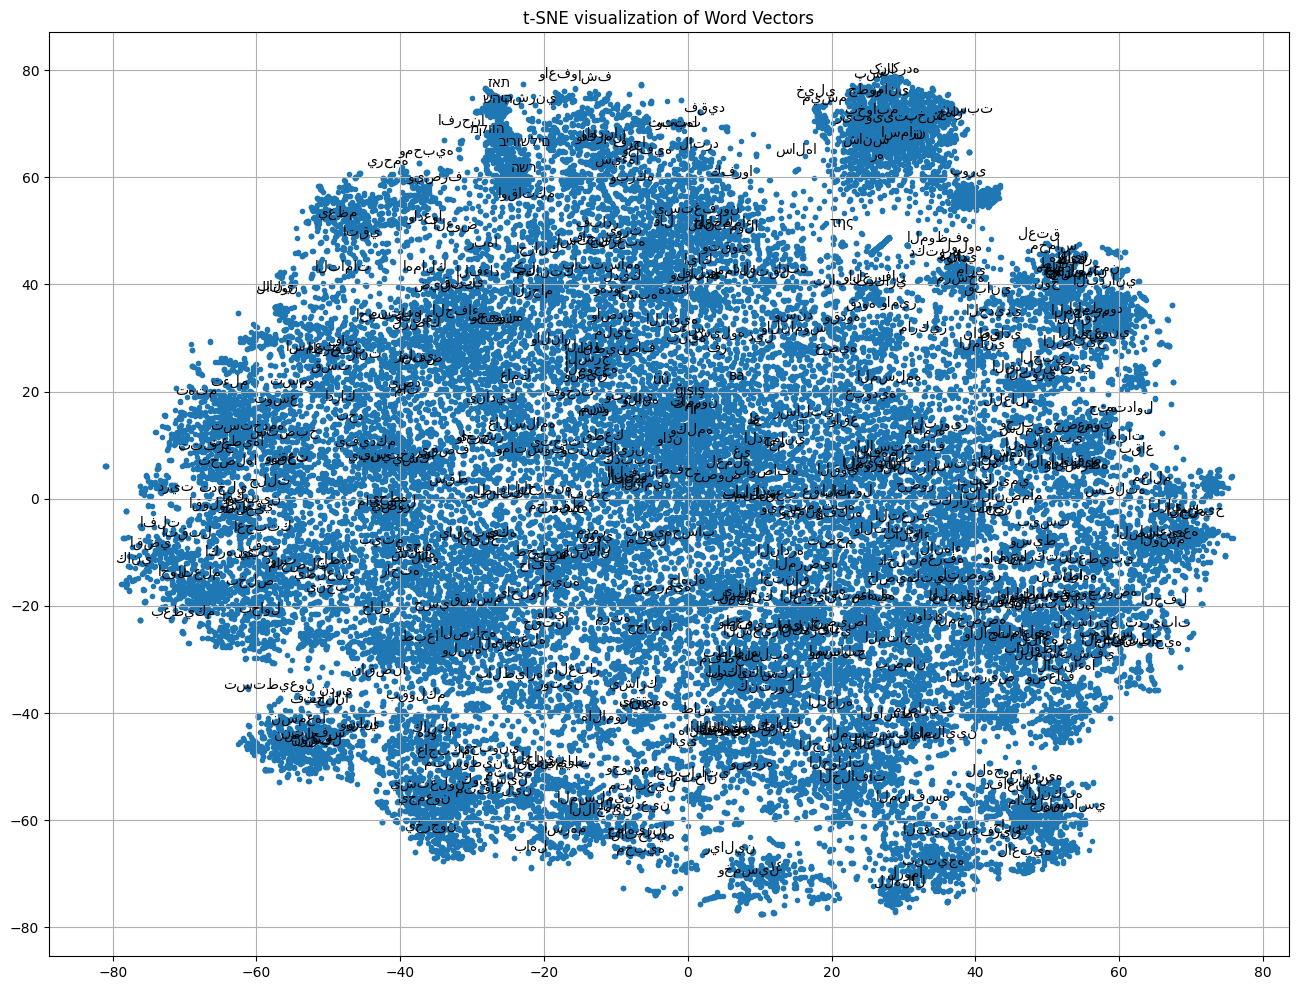

In [ ]:
plot_tsne(cbow_model, 't-SNE visualization of Word Vectors', labels_every=100, use_pca=True)

> The t-SNE visualization of the CBOW model's Arabic word vectors effectively demonstrates how high-dimensional data can be reduced while preserving semantic relationships. This visualization is crucial for NLP applications, highlighting how well the CBOW model captures the complexities of the Arabic language. Evaluating this approach, it is clear that t-SNE requires careful parameter tuning to provide clear results, but it is a powerful tool for exploring semantic relationships in detailed language data like Arabic.

In [ ]:
vectors = []
words_with_vectors = []
for word in words:
    if word in cbow_model.wv:
        vectors.append(cbow_model.wv[word])
        words_with_vectors.append(word)

vectors = np.array(vectors)

NameError: name 'words' is not defined

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

KeyboardInterrupt: 

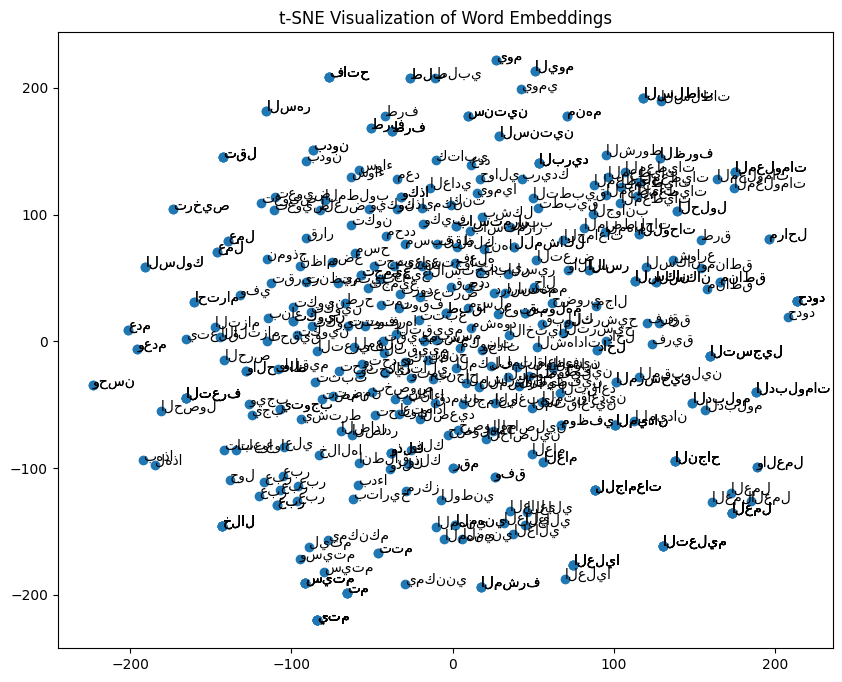

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(words_with_vectors):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()

> This plot visualizes the distribution of words based on their CBOW (Continuous Bag of Words) word embeddings. Each point on the plot represents a word, and its position reflects the semantic similarity with other words in the embedding space. The plot helps in understanding how words cluster together and their relationships within the CBOW model's vector space.

### Word2Vec Approach (Skip-gram)

The Skip-gram model is another Word2Vec approach where the model uses a target word to predict the surrounding context words in a given window. This method is particularly effective for learning high-quality word representations, especially for rare words in large datasets.

In [ ]:
skipgram_model = Word2Vec.load('w2v_SG_300_5_400_10.model')

In [ ]:
similarity_dict = {}
print('\nSimilarity dictionary for 5 randomly chosen words:')
random_five_words = random.sample(words, 5)

similarity_dict = {}
for word in random_five_words:
    if word in skipgram_model.wv:
        similarity_dict[word] = find_highest_pair(skipgram_model.wv.most_similar(word))
    else:
        similarity_dict[word] = None

print(similarity_dict)


Similarity dictionary for 5 randomly chosen words:
{'تتوفر': ('يتوفر', 0.7113440632820129), 'ستنظم': None, 'وضع': ('وضعه', 0.606036365032196), 'الاختيار': ('اختيار', 0.5839309692382812), 'المترشحين': None}


In [ ]:
words = list(skipgram_model.wv.index_to_key)
word_vectors = np.array([skipgram_model.wv[word] for word in words])

In [ ]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(word_vectors)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 49555 samples in 0.010s...
[t-SNE] Computed neighbors for 49555 samples in 10.561s...
[t-SNE] Computed conditional probabilities for sample 1000 / 49555
[t-SNE] Computed conditional probabilities for sample 2000 / 49555
[t-SNE] Computed conditional probabilities for sample 3000 / 49555
[t-SNE] Computed conditional probabilities for sample 4000 / 49555
[t-SNE] Computed conditional probabilities for sample 5000 / 49555
[t-SNE] Computed conditional probabilities for sample 6000 / 49555
[t-SNE] Computed conditional probabilities for sample 7000 / 49555
[t-SNE] Computed conditional probabilities for sample 8000 / 49555
[t-SNE] Computed conditional probabilities for sample 9000 / 49555
[t-SNE] Computed conditional probabilities for sample 10000 / 49555
[t-SNE] Computed conditional probabilities for sample 11000 / 49555
[t-SNE] Computed conditional probabilities for sample 12000 / 49555
[t-SNE] Computed conditional probabilities for s

C:\Users\Nouih\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2463 (\N{BENGALI LETTER TTA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nouih\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)


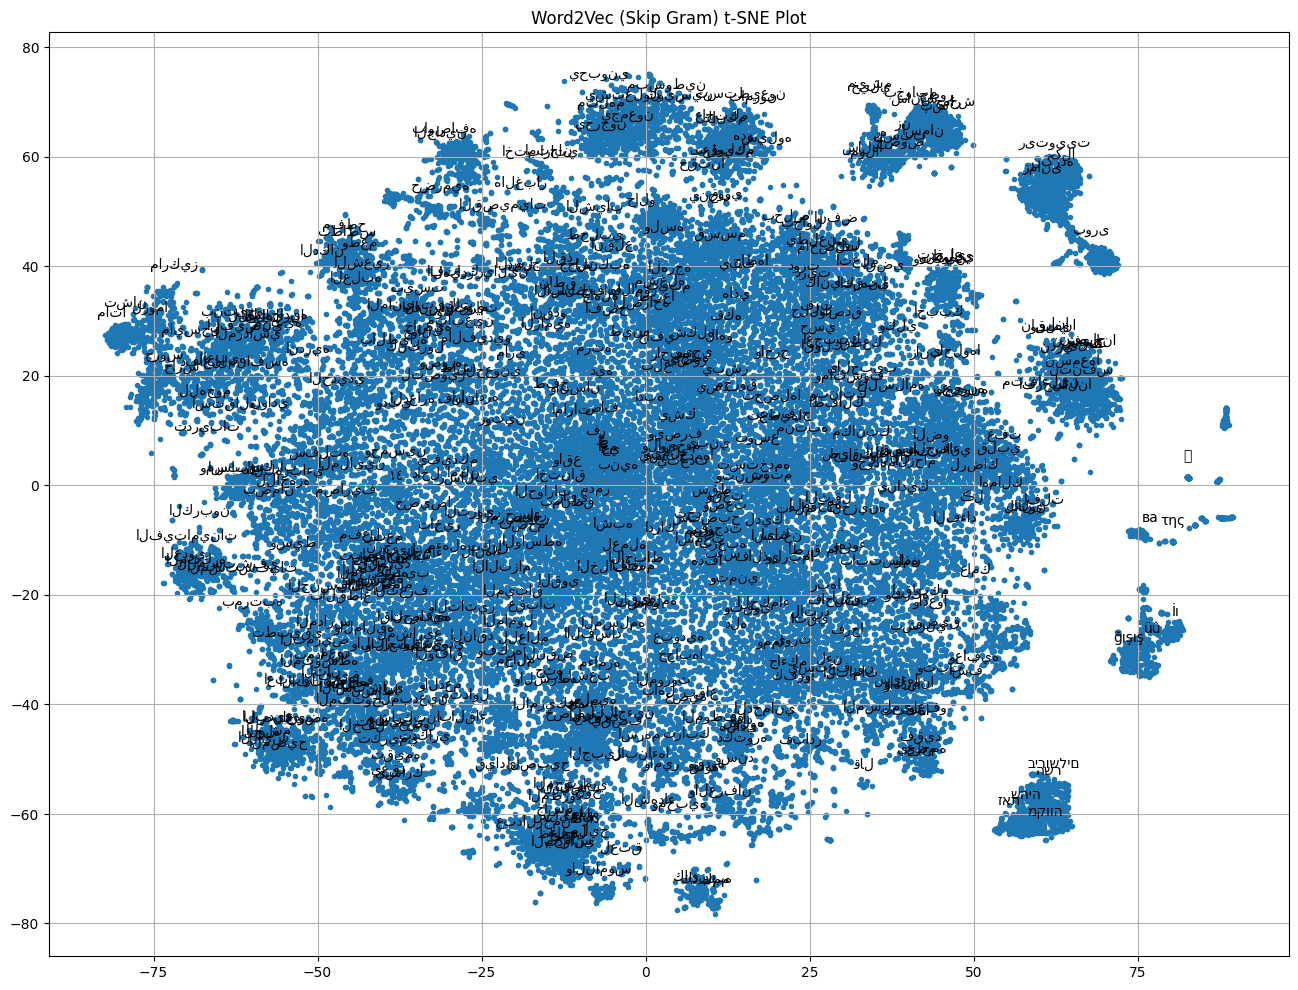

In [ ]:
plot_tsne(skipgram_model, 'Word2Vec (Skip Gram) t-SNE Plot', labels_every = 100, use_pca = True)

> The t-SNE visualization of the Skip-gram model's word vectors reveals a central clustering surrounded by several distinct groups and outliers, illustrating how this model excels in capturing deep semantic relationships, especially among less frequent words in Arabic. Compared to the CBOW model's denser, more centralized clustering, the Skip-gram plot shows more spread-out clusters, suggesting its strength in delineating nuanced word associations across a broader context. This characteristic makes the Skip-gram particularly valuable for exploring intricate linguistic patterns and rare contextual usages within large datasets.

In [ ]:
vectors = []
words_with_vectors = []
for word in words:
    if word in skipgram_model.wv:
        vectors.append(skipgram_model.wv[word])
        words_with_vectors.append(word)
vectors = np.array(vectors)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

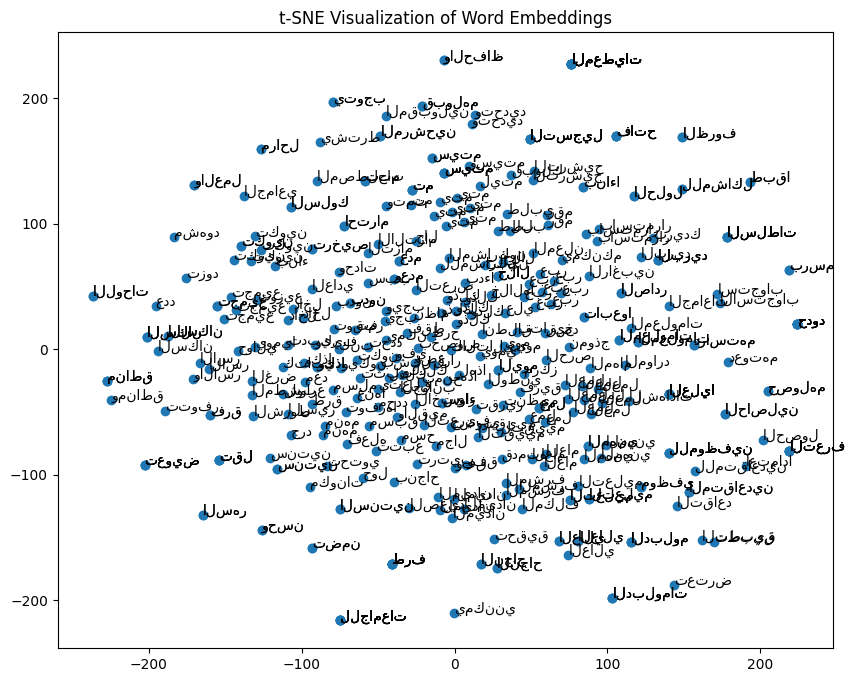

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

# Add labels
for i, word in enumerate(words_with_vectors):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()

> This plot visualizes the distribution of words based on their Skip-gram word embeddings. Each point on the plot represents a word, and its position reflects the semantic similarity with other words in the embedding space. The plot helps in understanding how words cluster together and their relationships within the Skip-gram model's vector space.

### FastText

FastText, developed by Facebook AI Research, is a powerful library for word embeddings in natural language processing. It extends the traditional Word2Vec model by considering each word as a bag of character n-grams, allowing it to capture morphological variations and semantic similarities even for out-of-vocabulary words. This approach makes FastText particularly effective for learning word representations, especially in scenarios with large datasets containing rare or unseen words. FastText's ability to handle subword information makes it robust for various NLP tasks, especially in languages with complex morphology and limited training data.

In [ ]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English


'cc.en.300.bin'

In [ ]:
model = fasttext.load_model('cc.en.300.bin')

In [ ]:
print('\nSimilarity dictionary for 5 randomly chosen words:')
random_five_words = random.sample(words, 5)

similarity_dict = {}
for word in random_five_words:
    try:
        similar_words = model.get_nearest_neighbors(word, k=1)
        similarity_dict[word] = find_highest_pair(similar_words)
    except KeyError:
        similarity_dict[word] = None

print(similarity_dict)


Similarity dictionary for 5 randomly chosen words:
{'وبرامج': (0.5855324864387512, 'topicsundressing'), 'الو': (0.6328796148300171, 'Gallegly'), 'دوب': (0.24389326572418213, 'qmobile'), 'فيدرر': (0.5608816146850586, 'fhg.officesexjp.com'), 'وجاد': (0.40833351016044617, 'STANSTED')}


In [ ]:
vectors = []
for word in words:
    try:
        vector = model.get_word_vector(word)
        vectors.append(vector)
    except KeyError:
        continue

vectors = np.array(vectors)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

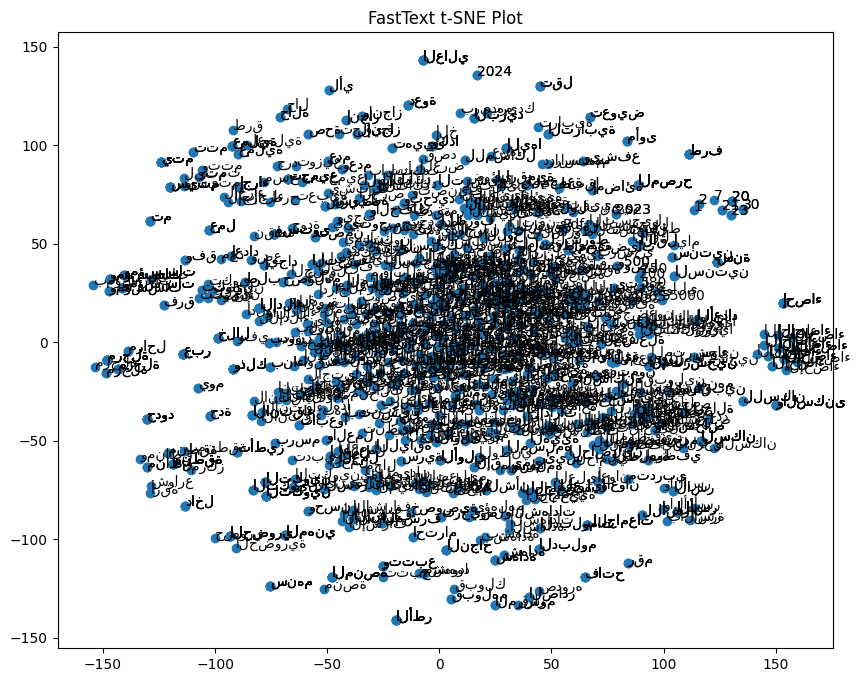

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title('FastText t-SNE Plot')
plt.show()

> This plot visualizes the distribution of words based on their FastText word embeddings. Each point on the plot represents a word, and its position reflects the semantic similarity with other words in the embedding space. The plot helps in understanding how words cluster together and their relationships within the FastText model's vector space.

## Synthesis:

During this lab, I gained valuable insights into various techniques in Natural Language Processing (NLP). Here's a brief summary of what I've learned:

1. **Rule-Based NLP and Regex**: I learned how to use regular expressions (Regex) to extract structured information from unstructured text data. This involved identifying patterns and using them to parse text and generate useful output, such as a bill from a shopping description.

2. **Word Embedding Techniques**: I explored several word embedding techniques, including:
    - One Hot Encoding: Representing words as sparse vectors with a single '1' indicating the presence of the word.
    - Bag of Words (BoW): Creating a sparse matrix representing the frequency of each word in a document.
    - TF-IDF: Calculating the importance of a word in a document based on its frequency across the corpus.
    - Word2Vec (Skip Gram and CBOW): Learning distributed representations of words in a continuous vector space.
    - FastText: More advanced word embedding models incorporating global word co-occurrence statistics and subword information.

3. **Visualization and Evaluation**: I visualized word embeddings using t-SNE to understand the semantic relationships between words in the embedding space. I evaluated the effectiveness of each technique in capturing semantic information and observed their strengths and weaknesses.

Overall, this lab provided a comprehensive overview of NLP techniques, from basic text processing with Regex to advanced word embedding models. I gained practical experience in implementing these techniques and learned how to evaluate their performance for various NLP tasks.